In [1]:
import torch
import pandas as pd

In [2]:
tox21_raw = pd.read_csv("data/raw/tox21.csv")
tox21_raw

,cano_smiles,NR-AR,NR-AR-LBD,NR-AhR,NR-Aromatase,NR-ER,NR-ER-LBD,NR-PPAR-gamma,SR-ARE,SR-ATAD5,SR-HSE,SR-MMP,SR-p53,group
0,s1c2cc(OCC)ccc2nc1S(=O)(=O)N,0.0,0.0,1.0,NaN,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,train
1,O[C@]1(CC[C@H]2[C@H]3[C@@H]([C@@H]4C(CC3)=CCCC...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,train
2,O=C(Nc1c(cccc1C)C)C(N(CCC)CC)CC,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,0.0,0.0,train
3,P(O)(O)(=O)C(P(O)(O)=O)(O)C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,train
4,O(OC(C)(C)C)C(CCC(OOC(C)(C)C)(C)C)(C)C,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7806,O=C1N(CC(O)=O)C(=O)c2c3c1cccc3ccc2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,valid
7807,Clc1cc(OC(F)(F)C(F)C(F)(F)F)c(Cl)cc1NC(=O)NC(=...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,valid
7808,O1c2c(N(c3cc(nnc13)N1CCN(CC1)C)C)cccc2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,0.0,NaN,NaN,valid
7809,S=P(Oc1ccccc1C(OC(C)C)=O)(OCC)NC(C)C,0.0,0.0,1.0,1.0,0.0,0.0,0.0,NaN,0.0,0.0,NaN,0.0,valid


array([[<AxesSubplot:title={'center':'NR-AR'}>,
        <AxesSubplot:title={'center':'NR-AR-LBD'}>,
        <AxesSubplot:title={'center':'NR-AhR'}>],
       [<AxesSubplot:title={'center':'NR-Aromatase'}>,
        <AxesSubplot:title={'center':'NR-ER'}>,
        <AxesSubplot:title={'center':'NR-ER-LBD'}>],
       [<AxesSubplot:title={'center':'NR-PPAR-gamma'}>,
        <AxesSubplot:title={'center':'SR-ARE'}>,
        <AxesSubplot:title={'center':'SR-ATAD5'}>],
       [<AxesSubplot:title={'center':'SR-HSE'}>,
        <AxesSubplot:title={'center':'SR-MMP'}>,
        <AxesSubplot:title={'center':'SR-p53'}>]], dtype=object)

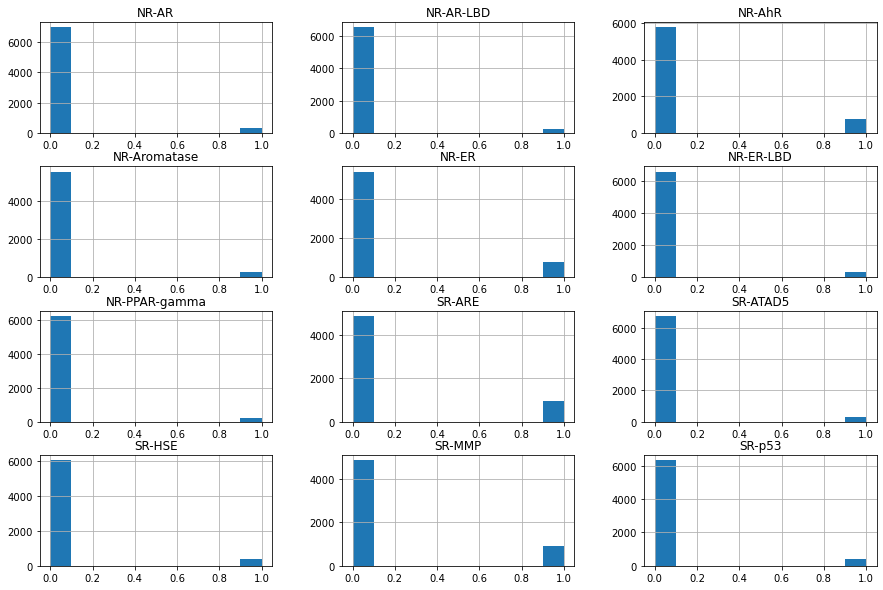

In [3]:
tox21_raw.hist(figsize=(15, 10))

In [5]:
tox21_sr_are = tox21_raw[["SR-ARE", "cano_smiles", "group"]]
print("Number of datapoints before drop NaNs: ", tox21_sr_are.shape[0])
tox21_sr_are_processed = tox21_sr_are.dropna()
print("Number of datapoints after drop NaNs: ", tox21_sr_are_processed.shape[0])

Number of datapoints before drop NaNs:  7811
Number of datapoints after drop NaNs:  5816


In [6]:
# This block is no longer used because we want to use the split in the paper instead

# from sklearn.model_selection import StratifiedShuffleSplit
# import os
# import os.path as osp

# split_file = "data/processed/tox21_split.pth"
# # Here we save previously generated split into a pth file, so we will use the same split between different runs
# if not osp.exists(split_file):
#     split = StratifiedShuffleSplit(n_splits=1, test_size=0.1)
#     train_index, test_index = next(split.split(tox21_sr_are_processed["smiles"], tox21_sr_are_processed["SR-ARE"]))
#     torch.save({"train_index": train_index, "test_index": test_index}, split_file)
# else:
#     split = torch.load(split_file)
#     train_index = split["train_index"]
#     test_index = split["test_index"]

In [9]:
train_data = tox21_sr_are_processed[tox21_sr_are_processed["group"]=="train"]
valid_data = tox21_sr_are_processed[tox21_sr_are_processed["group"]=="valid"]
test_data = tox21_sr_are_processed[tox21_sr_are_processed["group"]=="test"]

In [10]:
train_data

,SR-ARE,cano_smiles,group
0,1.0,s1c2cc(OCC)ccc2nc1S(=O)(=O)N,train
1,0.0,O[C@]1(CC[C@H]2[C@H]3[C@@H]([C@@H]4C(CC3)=CCCC...,train
3,0.0,P(O)(O)(=O)C(P(O)(O)=O)(O)C,train
5,0.0,ClS(=O)(=O)c1ccccc1,train
6,1.0,Ic1cc(cc(I)c1Oc1cc(I)c(O)cc1)CC(O)=O,train
...,...,...,...
6239,0.0,O=C1N(CCCCC(=O)C)C(=O)N(c2ncn(c12)CCC)C,train
6240,0.0,O=C1N(C=C(C=C1)C)c1ccccc1,train
6245,0.0,O(CC)c1nc2c(n1Cc1ccc(cc1)-c1ccccc1-c1[nH]nnn1)...,train
6247,0.0,Oc1cc2CC[C@H]3[C@@H]4CC[C@@H](O)[C@]4(CC[C@@H]...,train
